Імпортування модулів:

In [1]:
import pandas as pd
import copy

Завантаження файлів у dataframe:

In [2]:
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

Видалення колонок з коментарями:

In [3]:
trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])

Перевірка наявності NULL значень:

In [4]:
print(trains_dataframe.isnull().values.any())

True


Візуалізація 10 значень з 4 колонок:

In [5]:
visualisation = trains_dataframe[0:10].style.hide(['Year', 'Month', 'Departure station', 'Arrival station',
                                             'Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min', 'Period',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Period'], axis="columns")

visualisation.highlight_max(color='green').highlight_min(color='red')

,Average travel time (min),Number of trains late on arrival,Average delay of all arriving trains (min),Average train delay > 15min
0,131.914980,41.000000,5.233333,32.965873
1,175.611570,47.000000,6.123967,32.057143
2,62.395349,91.000000,4.430194,42.367241
3,172.421053,15.000000,3.812135,27.620833
4,67.310000,73.000000,4.176208,37.658333
5,266.594737,28.000000,8.422105,47.343452
6,265.262887,29.000000,8.407474,45.610920
7,85.399381,52.000000,5.523633,60.874405
8,46.305556,36.000000,5.154244,47.841667
9,67.000000,30.000000,3.633051,35.613889


Перезавантаження данних у dataframe, видалення колонок з коментарями та рядків із NULL значеннями. Оскільки менше 5% рядків містять NULL значення та оскільки більшість рядків з NULL значеннями мають більше половини NULL значень, то їх можна видалити.

In [6]:
del trains_dataframe
trains_dataframe = pd.read_csv("dataset/Regularities_by_liaisons_Trains_France.csv")

trains_dataframe = trains_dataframe.drop(columns=['Comment (optional) delays at departure','Comment (optional) delays on arrival'])
trains_dataframe = trains_dataframe.dropna()
print(trains_dataframe.isnull().values.any())


False


Видалення рядків з явно помилковими (від'ємними) значеннями:

In [7]:
mask = trains_dataframe.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)
trains_dataframe = trains_dataframe[~mask]

Створення dataframe з виключно числовими значеннями:

In [8]:
trains_dataframe_numerical = trains_dataframe.drop(columns=['Year', 'Month', 'Departure station', 'Arrival station','Period'])

Вирахування математичного сподівання набору даних:

In [9]:
trains_dataframe_numerical.mean()

Average travel time (min)                                                                                              166.749542
Number of expected circulations                                                                                        272.840132
Number of cancelled trains                                                                                               8.095729
Number of late trains at departure                                                                                      66.611592
Average delay of late departing trains (min)                                                                            14.967642
Average delay of all departing trains (min)                                                                              3.128474
Number of trains late on arrival                                                                                        37.057684
Average delay of late arriving trains (min)                                               

Вирахування дисперсії набору даних:

In [10]:
trains_dataframe_numerical.var()

Average travel time (min)                                                                                               6476.300342
Number of expected circulations                                                                                        24677.620043
Number of cancelled trains                                                                                               464.726686
Number of late trains at departure                                                                                      6406.866151
Average delay of late departing trains (min)                                                                             174.250359
Average delay of all departing trains (min)                                                                               23.808039
Number of trains late on arrival                                                                                         866.144200
Average delay of late arriving trains (min)                                 

Функція стандартизації колонки значень:

In [11]:
def standartizatinator(input_column):
    mean = input_column.mean()
    
    variation = input_column.var()
    
    return (input_column - mean)/variation

Використання створеної функції:

In [12]:
trains_dataframe_numerical_standart = trains_dataframe_numerical
trains_dataframe_numerical_standart = standartizatinator(trains_dataframe_numerical)

Імпортування бібліотек для візуалізації даних:

In [13]:
#import seaborn as waluigi
import seaborn as sns
import matplotlib.pyplot as plt

Створення lineplot для перших 100 значень середньої тривалості поїздки та середньої затримки у стандартизованих значеннях:

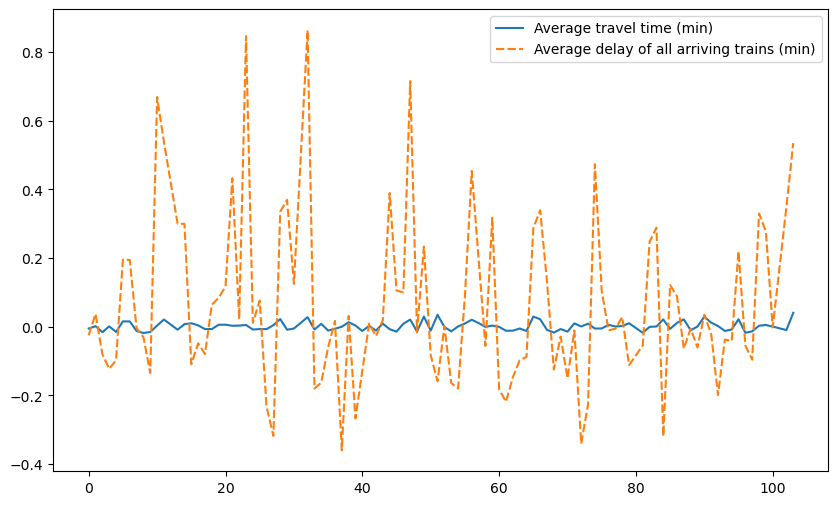

In [14]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(trains_dataframe_numerical_standart.drop(['Number of expected circulations',
                                             'Number of cancelled trains', 'Number of late trains at departure',
                                             'Average delay of late departing trains (min)',
                                             'Average delay of all departing trains (min)',
                                             'Average delay of late arriving trains (min)',
                                             '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
                                             '% trains late due to railway infrastructure (maintenance, works)',
                                             '% trains late due to traffic management (rail line traffic, network interactions)',
                                             '% trains late due to rolling stock',
                                             '% trains late due to station management and reuse of material',
                                             '% trains late due to passenger traffic (affluence, PSH management, connections)',
                                             'Number of late trains > 15min',
                                             'Number of late trains > 30min', 'Number of late trains > 60min',
                                             'Delay due to external causes', 'Delay due to railway infrastructure',
                                             'Delay due to traffic management', 'Delay due to rolling stock',
                                             'Delay due to station management and reuse of material',
                                             'Delay due to travellers taken into account','Number of trains late on arrival','Average train delay > 15min'],axis='columns')[0:100])

Створення barplot для відношення кількості потягів, які відправились з затримкою, до станцій

<Axes: xlabel='Departure station', ylabel='Number of late trains at departure'>

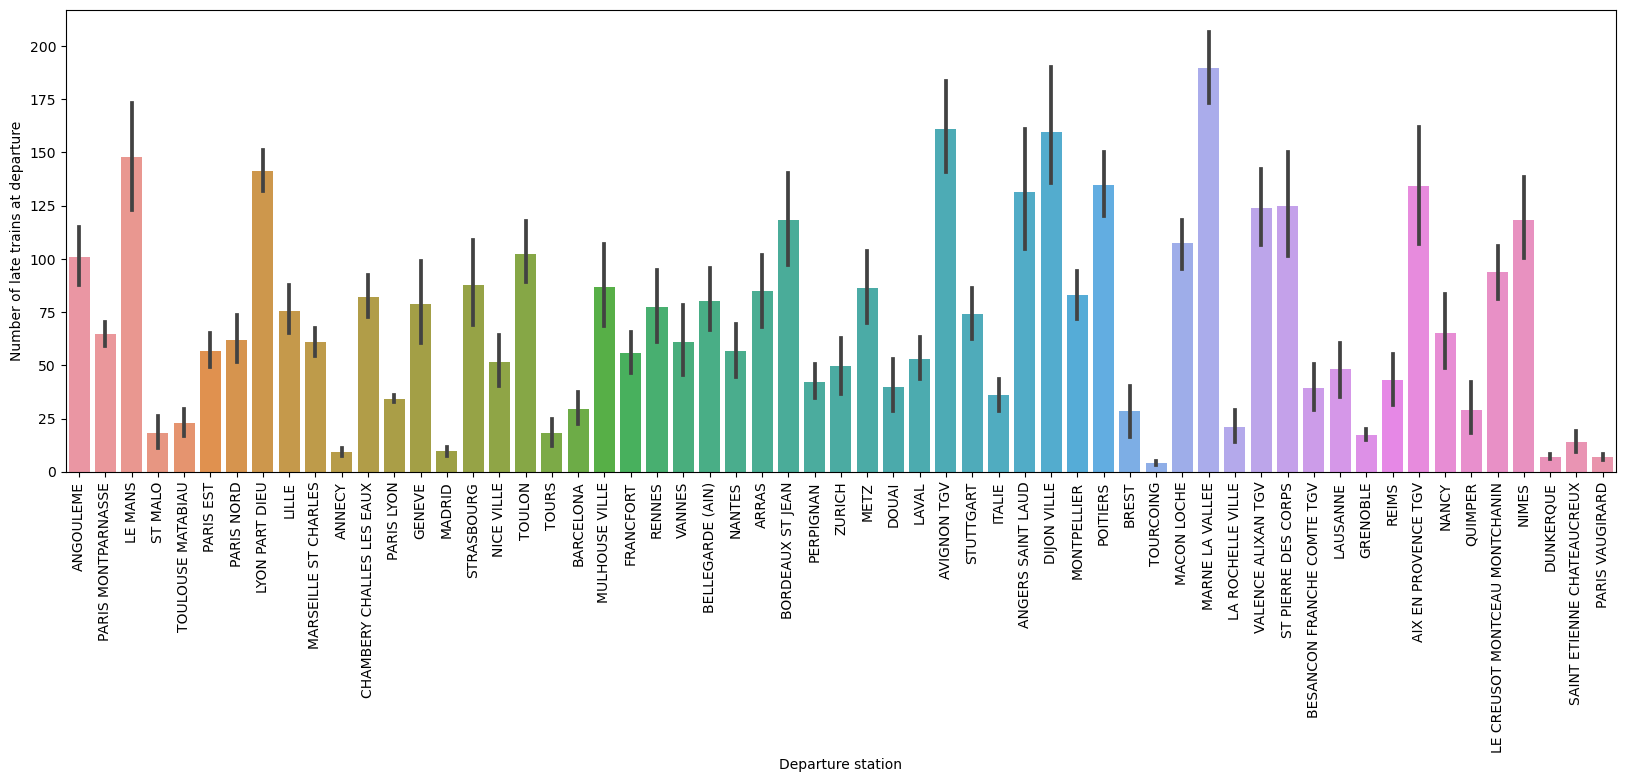

In [15]:
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x = trains_dataframe['Departure station'], y = trains_dataframe_numerical['Number of late trains at departure'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
barplot

Середня затримка потягів що запізнились за станціями:

<Axes: xlabel='Departure station', ylabel='Arrival station'>

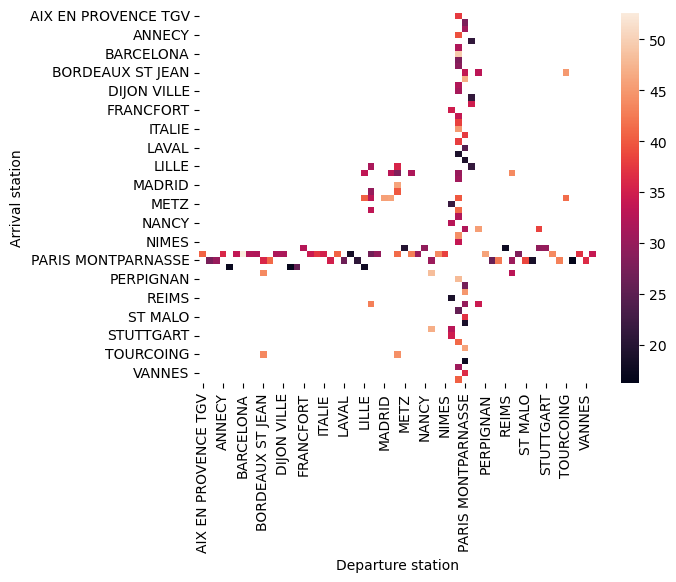

In [16]:
heatmap_df = trains_dataframe[['Departure station', 'Arrival station', 'Average delay of late arriving trains (min)']]
heatmap_grouped = heatmap_df.groupby([heatmap_df['Departure station'],heatmap_df['Arrival station']], as_index=False).mean()
heatmap_table = heatmap_grouped.pivot(index='Arrival station', columns='Departure station', values='Average delay of late arriving trains (min)')
sns.heatmap(heatmap_table)

Гістограмма кількості затриманих потягів, що прибувають, для перших 200 потягів

<Axes: xlabel='Departure station', ylabel='Count'>

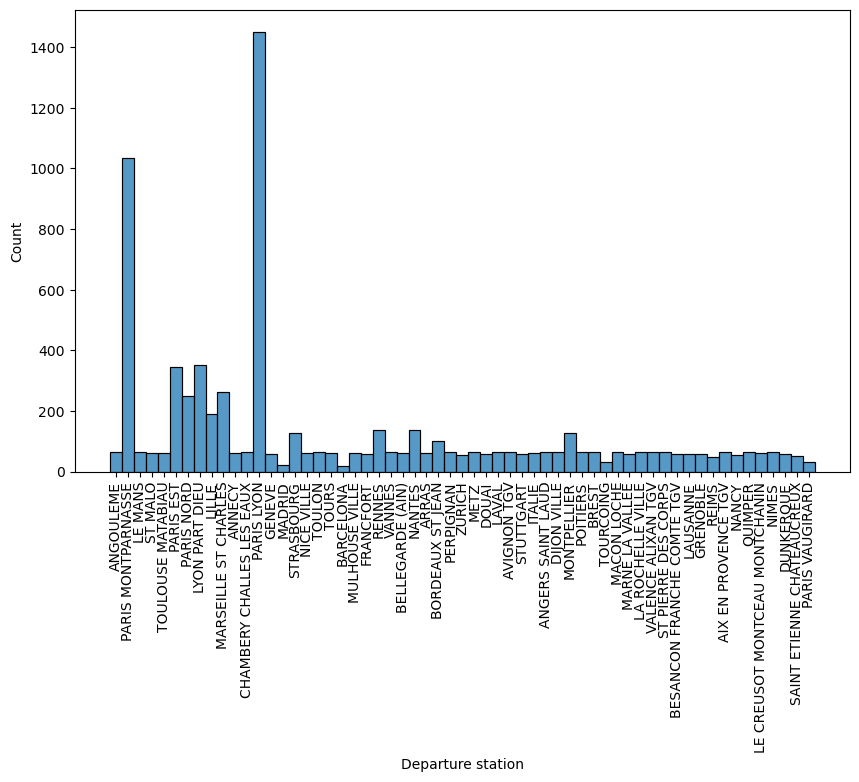

In [17]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(trains_dataframe_numerical.drop(['Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains > 15min', 'Average train delay > 15min',
       'Number of late trains > 30min', 'Number of late trains > 60min',
       'Delay due to external causes', 'Delay due to railway infrastructure',
       'Delay due to traffic management', 'Delay due to rolling stock',
       'Delay due to station management and reuse of material',
       'Delay due to travellers taken into account'],axis='columns')[0:200],x = trains_dataframe['Departure station'])

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
histplot

Лінійний графік з 4-ма лініями, які взяті з ознак з доданим annotate для середнього значення кожної лінії, де:<br>
Av. av. ldt -- середнє середньої затримки потягів відправлених із затримкою<br>
Av. av. adt -- середнє середньої затримки усіх відправлених потягів<br>
Av. av. lat -- середнє середньої затримки потягів прийнятих із затримкою<br>
Av. av. aat -- середнє середньої затримки усіх прийнятих потягів<br>

<Axes: >

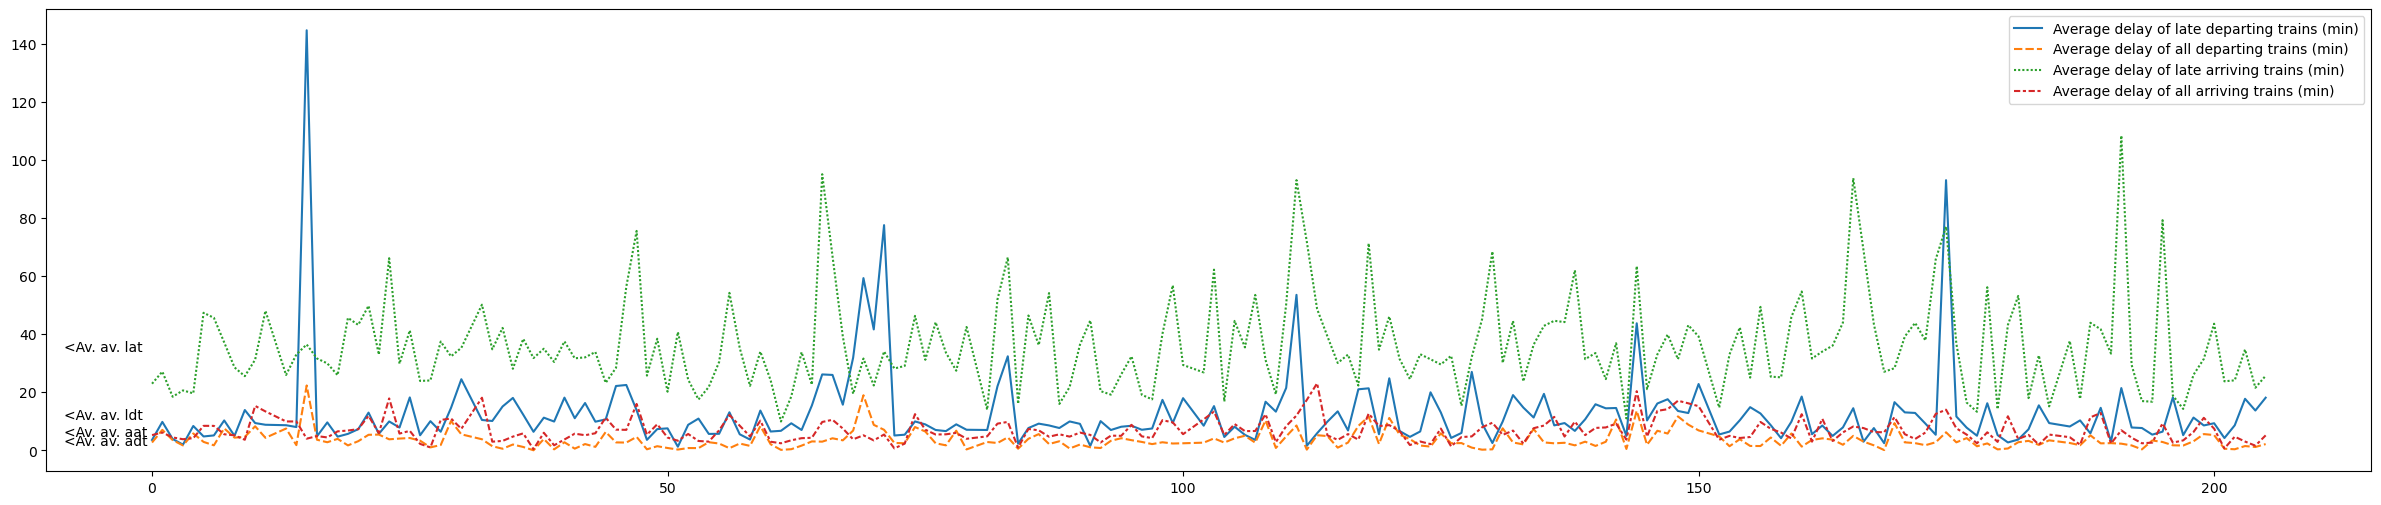

In [18]:
plt.figure(figsize=(30, 6))
range_of_plot = 200
pos_x = (range_of_plot/200)*(-8.5)
quad_lineplot = sns.lineplot(data = trains_dataframe_numerical[['Average delay of late departing trains (min)','Average delay of all departing trains (min)','Average delay of late arriving trains (min)','Average delay of all arriving trains (min)']][:range_of_plot])
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of late departing trains (min)']][:range_of_plot].mean()-2,"<Av. av. ldt",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of all departing trains (min)']][:range_of_plot].mean()-2,"<Av. av. adt",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of late arriving trains (min)']][:range_of_plot].mean()-2,"<Av. av. lat",fontsize=10)
quad_lineplot.text(pos_x,trains_dataframe_numerical[['Average delay of all arriving trains (min)']][:range_of_plot].mean()-2,"<Av. av. aat",fontsize=10)
quad_lineplot

Pairplot:

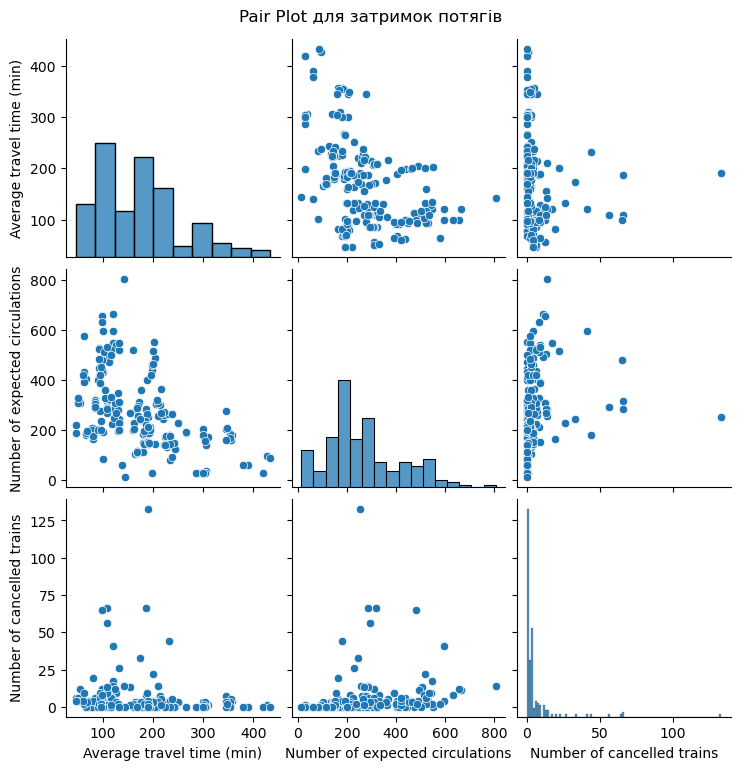

In [19]:
range_of_plot = 200
columns_of_interest = trains_dataframe_numerical.columns[0:3]

# Створіть підмножину даних для аналізу
subset_data = trains_dataframe_numerical[columns_of_interest][:range_of_plot]

# Додайте назви ліній в анотації
pair_plot = sns.pairplot(subset_data)

# Встановіть заголовок для всього графіку
pair_plot.fig.suptitle('Pair Plot для затримок потягів', y=1.02)

plt.show()


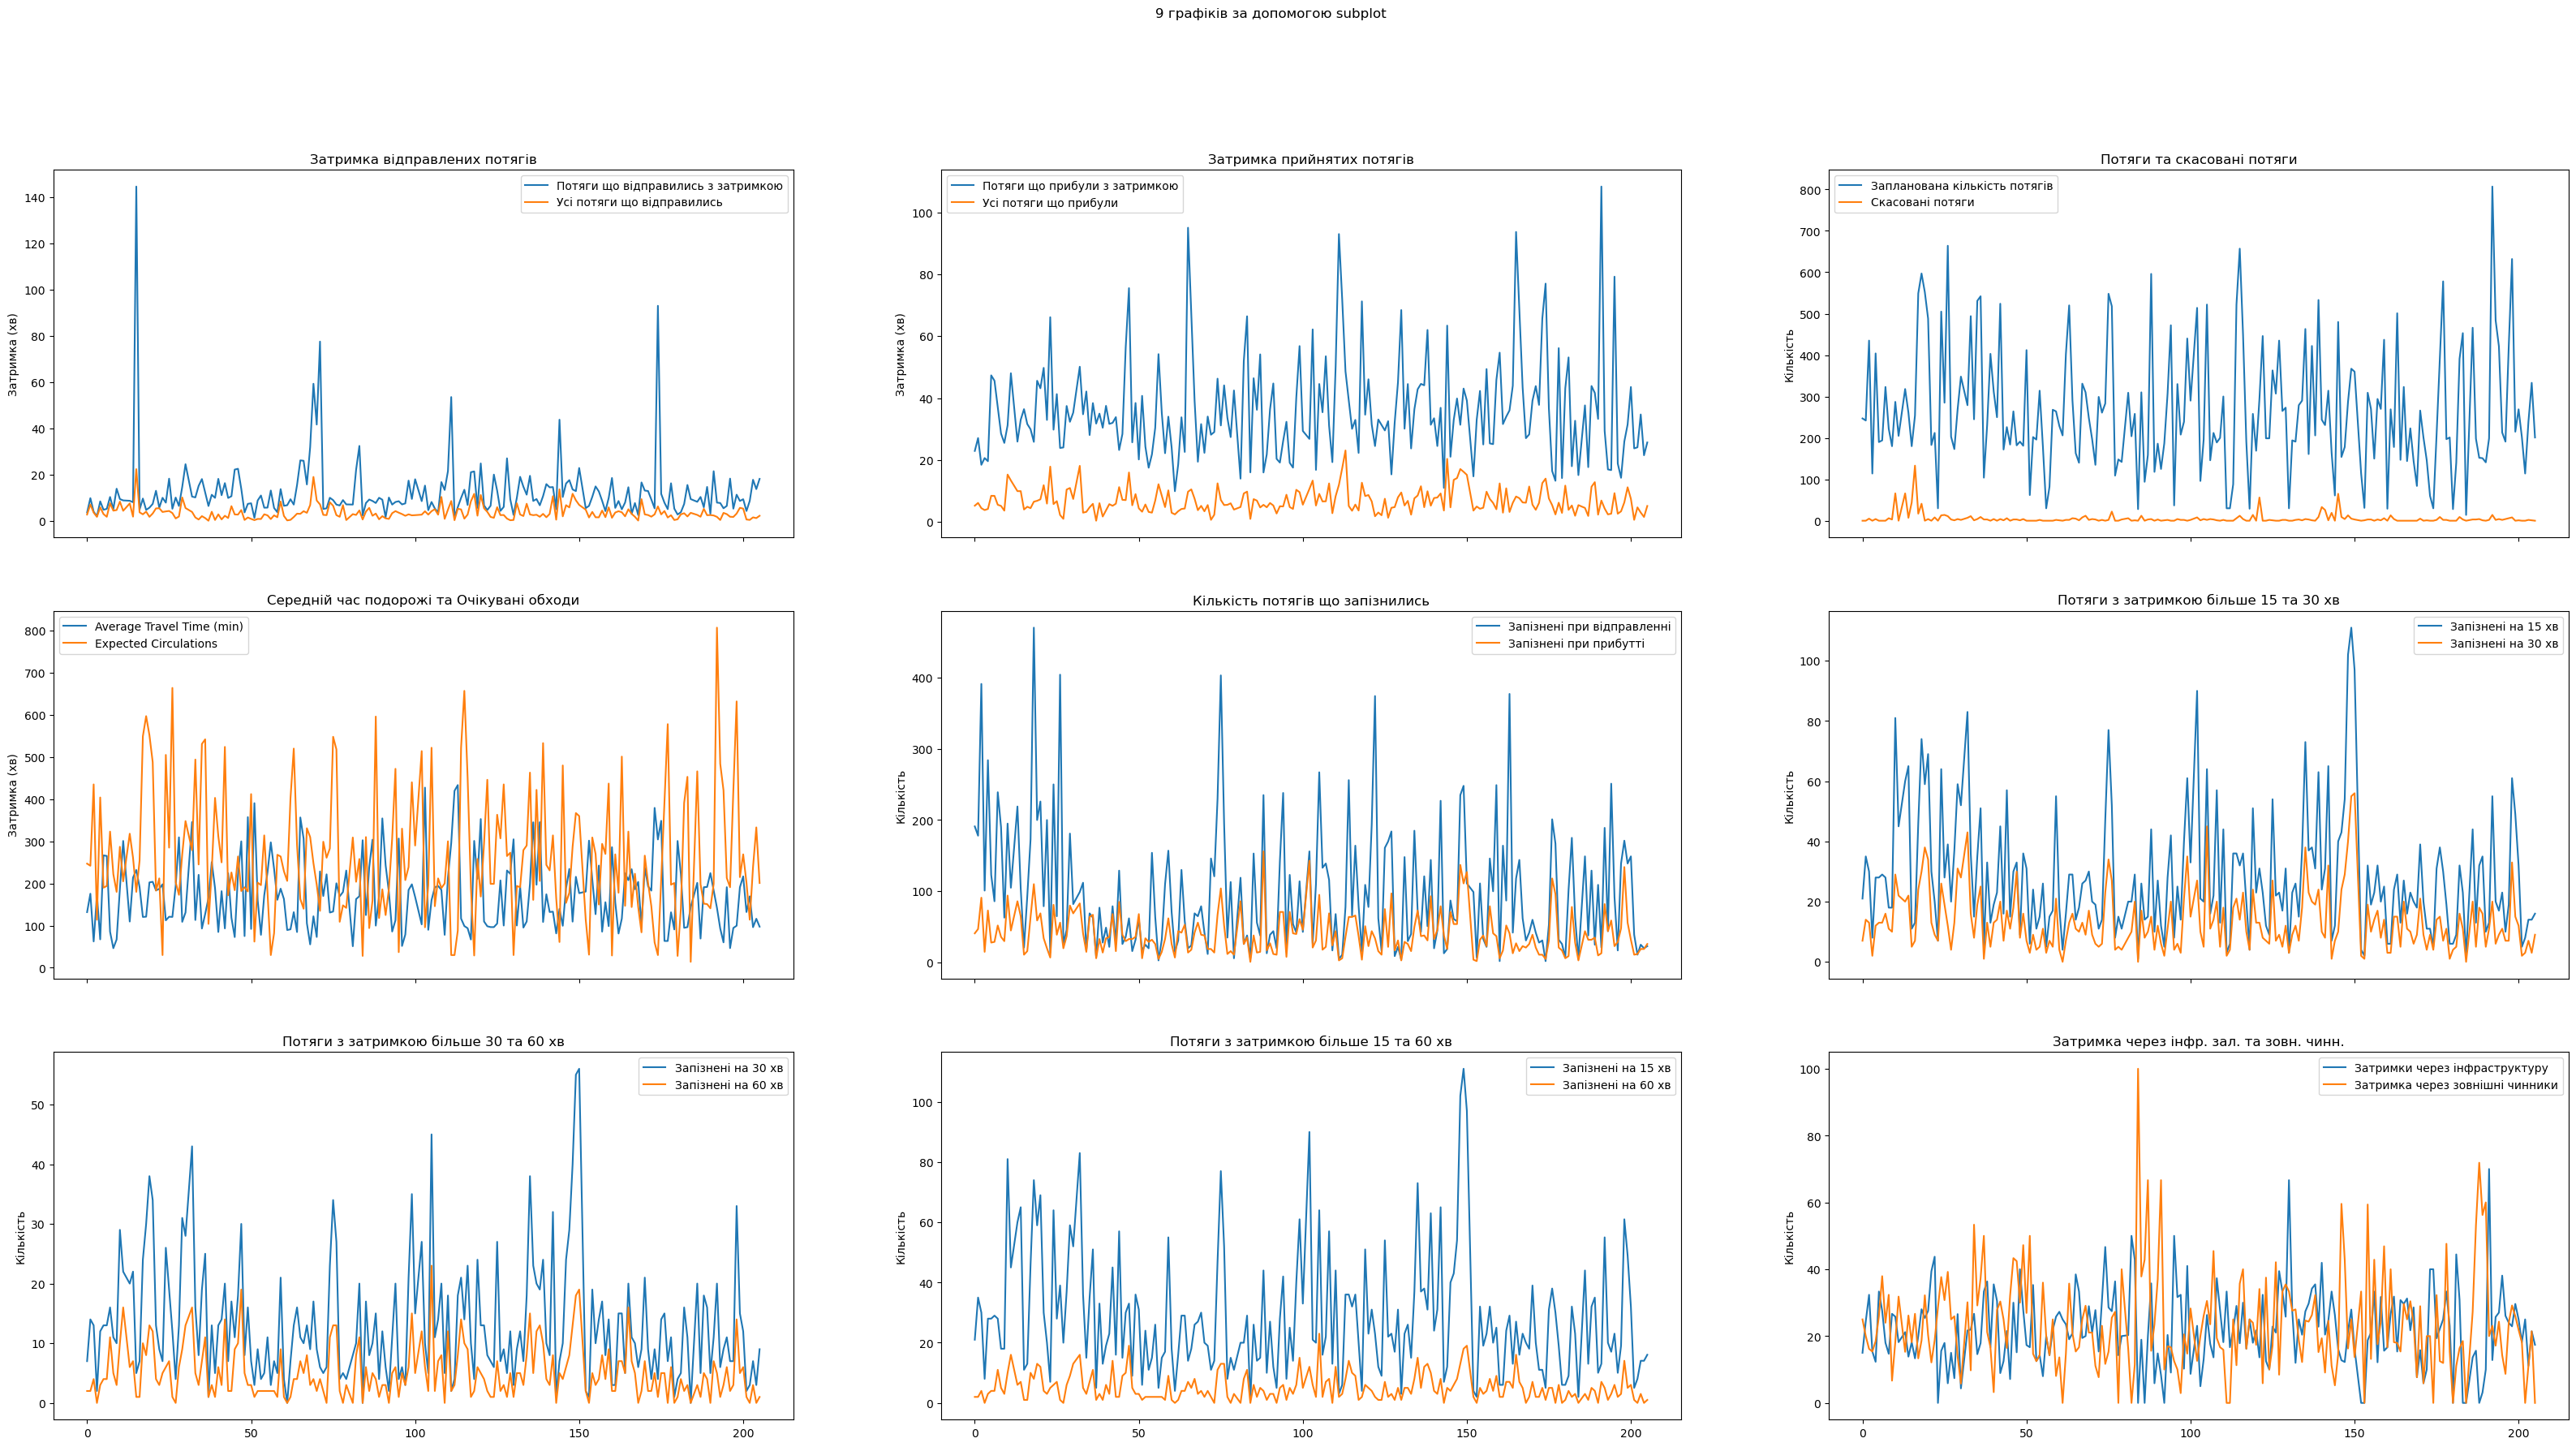

In [24]:
range_of_plot = 200
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(40, 20))
fig.suptitle('9 графіків за допомогою subplot')

# графік середніх затримок відправлених затриманих і усіх потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of late departing trains (min)'][:range_of_plot],
             ax=axes[0, 0], label='Потяги що відправились з затримкою')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of all departing trains (min)'][:range_of_plot],
             ax=axes[0, 0], label='Усі потяги що відправились')

axes[0, 0].set_ylabel("Затримка (хв)")
axes[0, 0].set_title("Затримка відправлених потягів")
axes[0, 0].legend()

# графік середніх затримок прийнятих затриманих і усіх потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of late arriving trains (min)'][:range_of_plot],
             ax=axes[0, 1], label='Потяги що прибули з затримкою')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average delay of all arriving trains (min)'][:range_of_plot],
             ax=axes[0, 1], label='Усі потяги що прибули')

axes[0, 1].set_ylabel("Затримка (хв)")
axes[0, 1].set_title("Затримка прийнятих потягів")
axes[0, 1].legend()

#графік кількості потягів та кількості скасованих потягів
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of expected circulations'][:range_of_plot],
             ax=axes[0, 2], label='Запланована кількість потягів')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of cancelled trains'][:range_of_plot],
             ax=axes[0, 2], label='Скасовані потяги')

axes[0, 2].set_ylabel("Кількість")
axes[0, 2].set_title("Потяги та скасовані потяги")
axes[0, 2].legend()

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Average travel time (min)'][:range_of_plot],
             ax=axes[1, 0], label='Average Travel Time (min)')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of expected circulations'][:range_of_plot],
             ax=axes[1, 0], label='Expected Circulations')

axes[1, 0].set_ylabel("Затримка (хв)")
axes[1, 0].set_title("Середній час подорожі та Очікувані обходи")
axes[1, 0].legend()

#графік кількості потягів що запізнились при відправленні та при прибутті
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains at departure'][:range_of_plot],
             ax=axes[1, 1], label='Запізнені при відправленні')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of trains late on arrival'][:range_of_plot],
             ax=axes[1, 1], label='Запізнені при прибутті')

axes[1, 1].set_ylabel("Кількість")
axes[1, 1].set_title("Кількість потягів що запізнились")
axes[1, 1].legend()

#графік кількості потягів що запізнились на більше ніж 15 та 30 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 15min'][:range_of_plot],
             ax=axes[1, 2], label='Запізнені на 15 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 30min'][:range_of_plot],
             ax=axes[1, 2], label='Запізнені на 30 хв')

axes[1, 2].set_ylabel("Кількість")
axes[1, 2].set_title("Потяги з затримкою більше 15 та 30 хв")
axes[1, 2].legend()

#графік кількості потягів що запізнились на більше ніж 30 та 60 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 30min'][:range_of_plot],
             ax=axes[2, 0], label='Запізнені на 30 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 60min'][:range_of_plot],
             ax=axes[2, 0], label='Запізнені на 60 хв')

axes[2, 0].set_ylabel("Кількість")
axes[2, 0].set_title("Потяги з затримкою більше 30 та 60 хв")
axes[2, 0].legend()

#графік кількості потягів що запізнились на більше ніж 15 та 60 хвилин
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 15min'][:range_of_plot],
             ax=axes[2, 1], label='Запізнені на 15 хв')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Number of late trains > 60min'][:range_of_plot],
             ax=axes[2, 1], label='Запізнені на 60 хв')

axes[2, 1].set_ylabel("Кількість")
axes[2, 1].set_title("Потяги з затримкою більше 15 та 60 хв")
axes[2, 1].legend()

#графік кількості затримок через інфраструктуру залізниці та зовнішні чинники
sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Delay due to railway infrastructure'][:range_of_plot],
             ax=axes[2, 2], label='Затримки через інфраструктуру')

sns.lineplot(x=trains_dataframe_numerical.index[:range_of_plot],
             y=trains_dataframe_numerical['Delay due to external causes'][:range_of_plot],
             ax=axes[2, 2], label='Затримка через зовнішні чинники')

axes[2, 2].set_ylabel("Кількість")
axes[2, 2].set_title("Затримка через інфр. зал. та зовн. чинн.")
axes[2, 2].legend()


plt.show()